In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

input_file = "c:\\diabetes.csv"
df = pd.read_csv(input_file, header = 0)

numpy_array = df.to_numpy()
X = numpy_array[:,:-1]
y = numpy_array[:,-1]
index = y==1
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


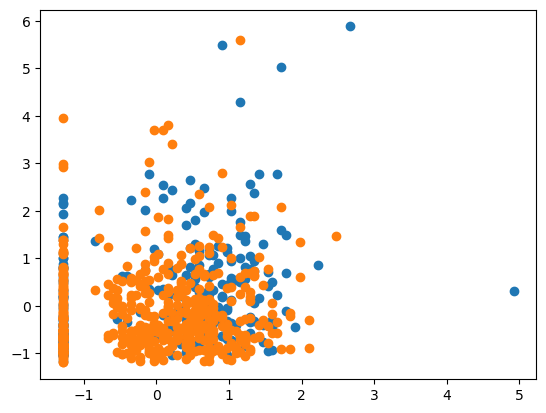

In [6]:
# Only use BMI and DiabetesPedigreeFunction as the input features
XX = numpy_array[:,[3,6]]
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
XX_s = scaler.fit_transform(XX)
plt.scatter(XX_s[index,0],XX_s[index,1])
plt.scatter(XX_s[~index,0],XX_s[~index,1])

array([2.09437995, 1.73121014, 0.41981618, 0.40446205, 0.68262839,
       0.76234439, 0.87552904, 1.02962987])

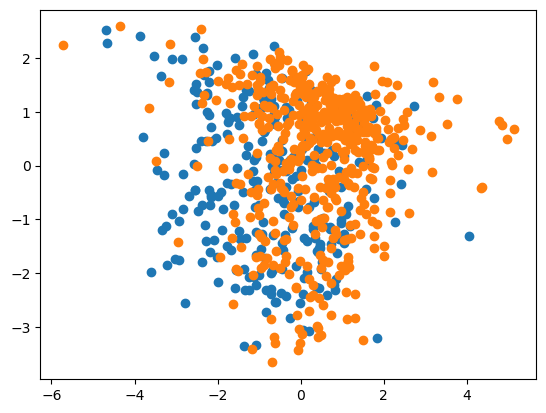

In [7]:
# Perform PCA
scaler = StandardScaler()
X_s = scaler.fit_transform(X)
m = np.mean(X_s,axis=0)
cov = 1/768*(X_s - m.reshape([1,-1])).T.dot(X_s - m.reshape([1,-1]))
cov.shape
Lamda,P = np.linalg.eig(cov)
XP = X_s.dot(P[:,:2])
plt.scatter(XP[index,0],XP[index,1])
plt.scatter(XP[~index,0],XP[~index,1])
Lamda

In [8]:
# perform ICA
from sklearn.decomposition import FastICA
transformer = FastICA(n_components=2,
        random_state=0,
        whiten='unit-variance')
X_transformed = transformer.fit_transform(X_s)
X_transformed.shape

(768, 2)

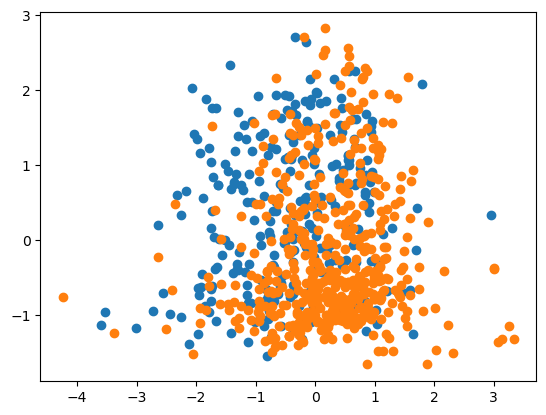

In [33]:
plt.scatter(X_transformed[index,0],X_transformed[index,1])
plt.scatter(X_transformed[~index,0],X_transformed[~index,1])

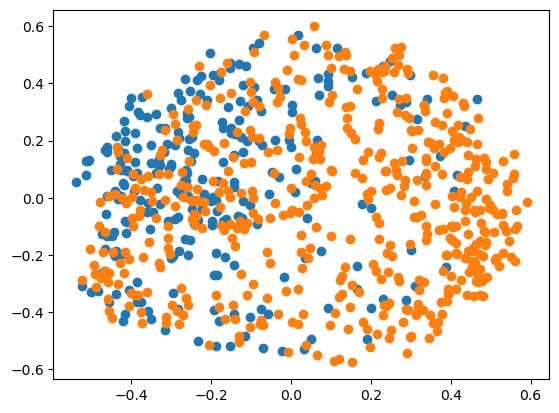

In [9]:
# perform KernelPCA
from sklearn.decomposition import KernelPCA
transformer = KernelPCA(n_components=2, kernel='rbf')
X_transformed = transformer.fit_transform(X_s)
plt.scatter(X_transformed[index,0],X_transformed[index,1])
plt.scatter(X_transformed[~index,0],X_transformed[~index,1])

In [1]:
0.678**2+0.536**2

0.7469800000000001